<a href="https://colab.research.google.com/github/KorostelevMaxim/Data_analytics/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%9F%D1%83%D1%82%D1%8C_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0%C2%BB_%D0%9A%D0%BE%D1%80%D0%BE%D1%81%D1%82%D0%B5%D0%BB%D0%B5%D0%B2_%D0%9C%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Аналитик крупного агрегатора такси. Теперь перед Вами стоит важная задача: самостоятельно провести исследование данных, проверить гипотезу о поведенческом предпочтении пользователей к определённому классу такси и сделать выводы, чтобы помочь компании стать лучшей на рынке…

Исследуем данные и строим графики плотности распределения дистанций поездок для классов “Economy” и “Comfort”

Проверяем гипотезу (H1): “На дальние поездки, пользователи предпочитают Economy-классу более комфортные условия поездки - Comfort-класс”


Подключение библиотек

In [ ]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

Загрузка и просмотр данных

In [ ]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head()


,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


Формирование выборок по категории такси

In [ ]:
df_1 = df[df['offer_class_group'] == 'Economy']
df_2 = df[df['offer_class_group'] == 'Comfort']
print('Выборки имеют одинаковую длину: ', len(df_1) == len(df_2))

Выборки имеют одинаковую длину:  True


Просмотр описательный статистики для класса Economy

In [ ]:
df_1.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


In [ ]:
df_1['distance_km'].count()

500

In [ ]:
st.mean(df_1['distance_km'])

26.283116862179483

In [ ]:
st.stdev(df_1['distance_km'])

17.01615268667912

In [ ]:
df_1['distance_km'].min()

0.08994740093195475

In [ ]:
df_1['distance_km'].max()

90.5166181048858

In [ ]:
df_1['distance_km'].quantile([0,0.25,0.5,0.75,1])

0.00     0.089947
0.25    13.372229
0.50    23.798183
0.75    36.845287
1.00    90.516618
Name: distance_km, dtype: float64

Просмотр описательный статистики для класса Comfort

In [ ]:
df_2.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


In [ ]:
df_2['distance_km'].count()

500

In [ ]:
st.stdev(df_2['distance_km'])

17.644643077451175

In [ ]:
df_2['distance_km'].min()

0.02425920721393027

In [ ]:
df_2['distance_km'].max()

81.50702248866502

In [ ]:
df_2['distance_km'].quantile([0,0.25,0.5,0.75,1])

0.00     0.024259
0.25    16.345205
0.50    28.078273
0.75    41.300650
1.00    81.507022
Name: distance_km, dtype: float64

Визуализация плотности распределения данных класса Economy

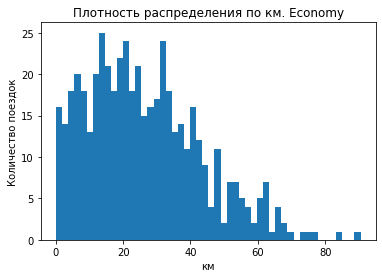

In [ ]:
# Гистограмма плотности распределения данных
plt.hist(df_1['distance_km'], 50)
plt.title('Плотность распределения по км. Economy')
plt.xlabel('км')
plt.ylabel('Количество поездок')
plt.show()

Визуализация плотности распределения данных класса Comfort

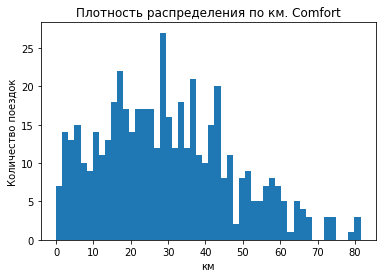

In [ ]:
# Гистограмма плотности распределения данных
plt.hist(df_2['distance_km'], 50)
plt.title('Плотность распределения по км. Comfort')
plt.xlabel('км')
plt.ylabel('Количество поездок')
plt.show()

In [ ]:
# Класс Economy - Распределение с отклонением вправо. Положительное отклонение
# Класс Comfort - Распределение с отклонением вправо. Положительное отклонение. 
# Но данное распределение уже близко к нормальному распределению (Comfort)

Визуализация доверительных интервалов

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


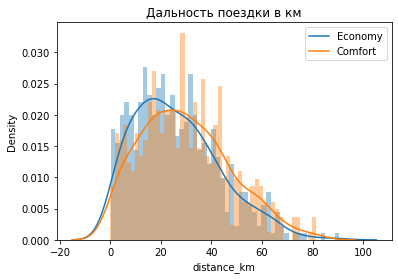

In [ ]:
sns.distplot(df_1['distance_km'], 50)
sns.distplot(df_2['distance_km'], 50)
plt.title('Дальность поездки в км')
plt.legend(['Economy', 'Comfort'])
plt.show()

In [ ]:
# Уровень значимости
alpha = 0.05

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
  print('Отвергаем H0')
else:
  print('Не отвергаем H0')

p-value: 0.00156751
Отвергаем H0


In [ ]:
# Выбор категории такси Comfort статистически значимо отличается от Economy на дальние поездки
# Клиенты предпочитают категорию Comfort на дальние поездки

Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [ ]:
result = mannwhitneyu(df_1['distance_km'], df_2['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
  print('Отвергаем H0')
else:
  print('Не отвергаем H0')

p-value: 0.00064246
Отвергаем H0


In [ ]:
# Выбор категории такси Comfort статистически значимо отличается от Economy на дальние поездки
# Клиенты предпочитают категорию Comfort на дальние поездки